### Desafio proposto

O projeto em questão representa um desafio apresentado no Kaggle, onde o objetivo central consiste em analisar se determinados grupos de passageiros do RMS Titanic tinham maior probabilidade de sobreviver ao trágico acidente que ocorreu em 15 de abril de 1912, durante sua viagem inaugural. Mesmo sendo considerado "inafundável", o Titanic naufragou após colidir com um iceberg, resultando na perda de 1502 vidas entre os 2224 passageiros e tripulantes, devido à insuficiência de botes salva-vidas.

Diante desse contexto, a proposta é desenvolver um modelo preditivo capaz de responder à pergunta essencial: "Quais grupos de pessoas apresentavam maior propensão à sobrevivência?". Para abordar essa indagação, será utilizado um conjunto de dados que inclui informações sobre os passageiros, como nome, idade, sexo, classe socioeconômica, entre outros fatores cruciais.

A competição relacionada ao desafio pode ser acessada através do seguinte link: https://www.kaggle.com/competitions/titanic/overview

Este projeto visa explorar as nuances que contribuíram para a sobrevivência em uma das tragédias marítimas mais marcantes da história, oferecendo insights valiosos sobre os fatores que influenciaram as chances de sobrevivência dos passageiros do RMS Titanic.

In [3]:
import pandas as pd

### DB Treino

In [4]:
treino = pd.read_csv('train.csv')


In [5]:
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
from ydata_profiling import ProfileReport

In [7]:
profile = ProfileReport(treino, title="titanic_treino")


In [8]:
# Criando o relatório com ydata_profiling formato html
profile.to_file("titanic_treino.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_d

In [9]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
treino.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [11]:
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### DB Teste

In [12]:
teste = pd.read_csv('test.csv')

In [13]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [16]:
treino.shape

(891, 12)

- Temos colunas que **possuem valores vazios na base de teste que não estão vazias na base de treino** (nesse caso, precisaríamos tratar essas colunas apenas na base de teste)

### Realizando os tratamentos iniciais dos dados

- Tratando valores vazios

In [18]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

- Colunas com **alta cardinalidade** como nome, número do ticket e até mesmo o código da cabine não vão ajudar o modelo pois podem torná-lo **menos generalizável**. Nesse caso, vamos **eliminar essas colunas**

In [20]:
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [21]:
teste = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

- Agora precisamos tratar a coluna **Age**, que possui valores vazios tanto no treino quanto no teste

In [26]:
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [27]:
treino.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


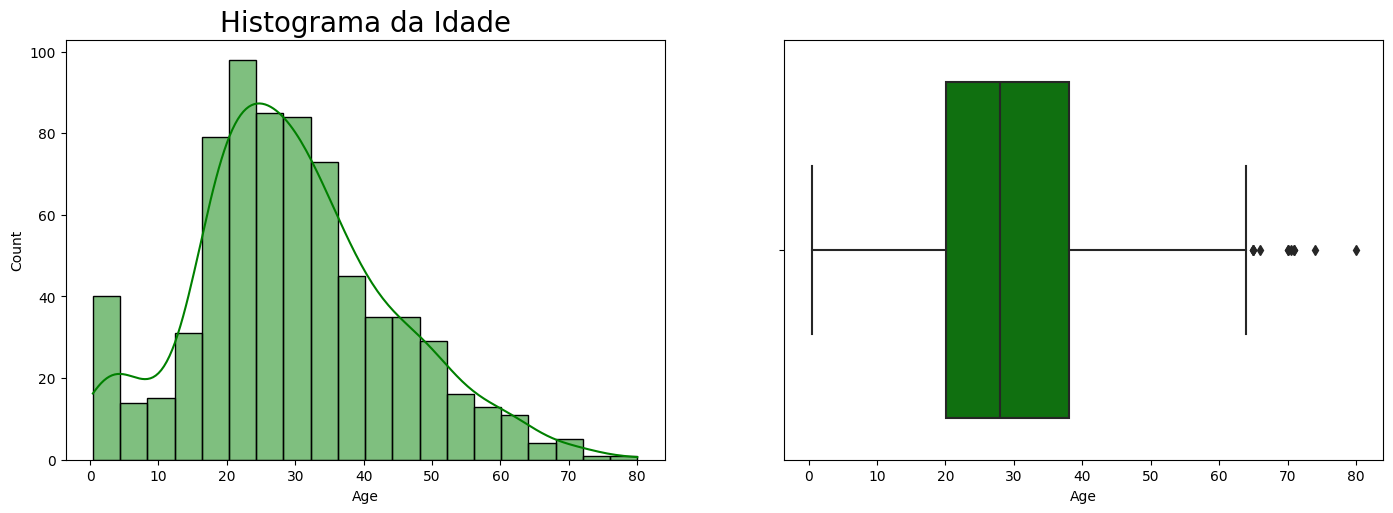

In [36]:
# Figura
%matplotlib inline
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente

# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
plt.subplot(221)
sns.histplot(treino['Age'], kde = True, color = "green")
plt.title('Histograma da Idade', fontsize = 20)

plt.subplot(222)
sns.boxplot(x=treino['Age'], color = "green")


plt.show()

In [38]:
treino.Age.mean()

29.69911764705882

In [39]:
treino.Age.median()

28.0

- Como essa coluna possui a idade dos passageiros, iremos imputar a **mediana das idades** para substituir os valores vazios, uma vez que há alguns outliers que podem estar interferindo na média.

In [40]:
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.median()

In [42]:
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.median()

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


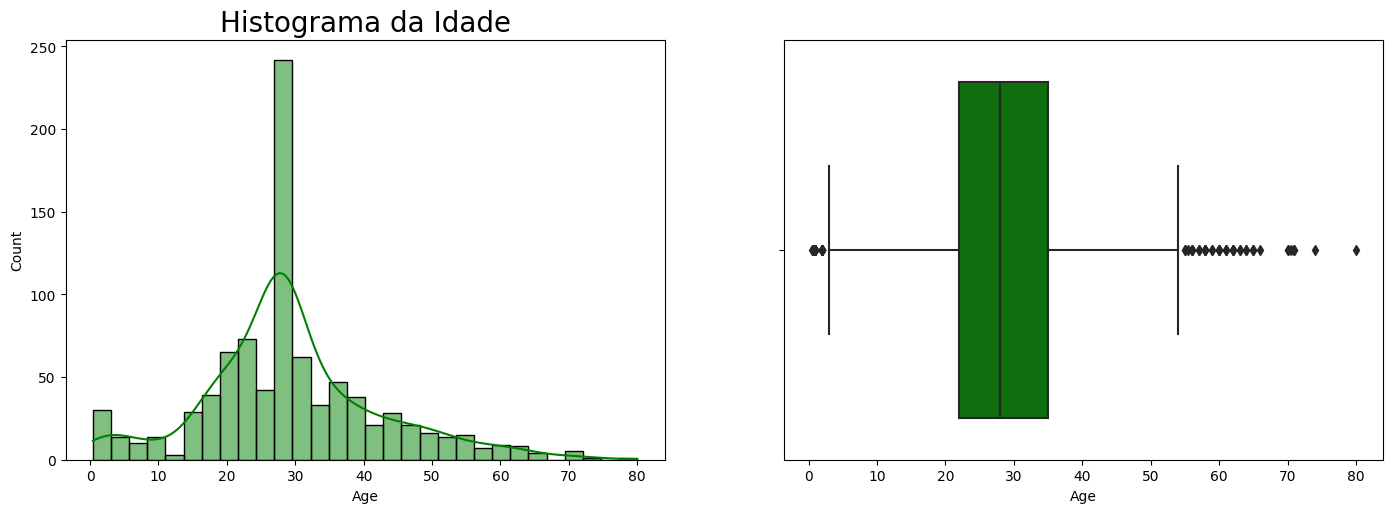

In [41]:
# Figura
%matplotlib inline
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente

# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
plt.subplot(221)
sns.histplot(treino['Age'], kde = True, color = "green")
plt.title('Histograma da Idade', fontsize = 20)

plt.subplot(222)
sns.boxplot(x=treino['Age'], color = "green")


plt.show()

- Para a base de treino, ainda temos 2 valores vazios na coluna **Embarked**


In [44]:
treino.isnull().sum().sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [45]:
treino.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

- Ao verificar todos os valores nessa coluna, optamos por substituir os valores vazios pela **moda**

In [47]:
treino.Embarked.mode()[0]

'S'

In [48]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

- Para finalizar, para a base de teste ainda temos 1 valor vazio em **Fare**

In [49]:
teste.isnull().sum().sort_values(ascending=False)

Fare           1
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

- Vamos utilizar a mesma lógica que fizemos para a coluna Embarked e substituir pela **moda**

In [50]:
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

In [51]:
teste.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [52]:
treino.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [56]:
treino.columns[treino.dtypes != 'object']

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [57]:
treino_nr = treino.loc[:,treino.columns[treino.dtypes != 'object']]

In [58]:
teste_nr = teste.loc[:,teste.columns[teste.dtypes != 'object']]

In [61]:
print(treino_nr.columns,'\n', teste_nr.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object') 
 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


### Alguns modelos de teste que poderiam ser usados para classificar os presentes dados
- Para começar, vamos testar entre:
    - **Árvore de classificação**
        - https://scikit-learn.org/stable/modules/tree.html#classification
    - **Classificação dos vizinhos mais próximos**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [62]:
# pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.2 MB 10.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.2 MB 11.1 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/9.2 MB 11.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.2 MB 11.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.2 MB 11.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.2 MB 11.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.2 MB 10.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.2 MB 11.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.8/9.2 MB 11.3 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.2 MB 11.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/9.2 MB 11.3 MB/s eta 0:0


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


- train_test_split é uma função da biblioteca Scikit-Learn que tem o objetivo de dividir um conjunto de dados em duas partes: uma para treinamento do modelo e outra para avaliação do desempenho do modelo. A função garante que o modelo generalize bem para novos dados não vistos, prevenindo overfitting. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é reservado para avaliação de desempenho.

In [66]:
from sklearn.model_selection import train_test_split

In [85]:
X   = treino_nr.drop(['PassengerId','Survived'],axis=1)
# A tabela abaixo atribui o resultado que esperamos, para verificar se há um modelo que possa prever os sobreviventes.
y = treino.Survived

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Criando arvore de classificação

In [68]:
from sklearn import tree

In [69]:
# Criando o classificador
# clf -> classificação
# ac -> arvore de classificação
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [70]:
# Fazendo o fit com os dados (treinando o modelo)
clf_ac = clf_ac.fit(X_train,y_train)

In [71]:
y_pred_ac = clf_ac.predict(X_val)

### Para o **KNeighborsClassifier**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Criando o classificador
# clf -> classificação
# knn -> modelo usado (kneighborsclassifier)
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [74]:
# Fazendo o fit com os dados (treinando o modelo)
clf_knn = clf_knn.fit(X_train,y_train)

In [75]:
y_pred_knn = clf_knn.predict(X_val)

### Para a **Regressão Logística**

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
# Criando o classificador
# clf -> classificador
# rl -> Regressão Logística
clf_rl = LogisticRegression(random_state=42)

In [78]:
# Fazendo o fit com os dados (treinando o modelo)
clf_rl = clf_rl.fit(X_train,y_train)

In [79]:
y_pred_rl = clf_rl.predict(X_val)

### Para finalizar, vamos avaliar esses modelos treinados:
- Para fazer essa análise, será usado:
    - Acurácia (método de avaliação usado na competição):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
# Verificando acurácia para a árvore de classificação
accuracy_score(y_val, y_pred_ac)

0.6101694915254238

In [83]:
# Verificando acurácia para o knn
accuracy_score(y_val, y_pred_knn)

0.6440677966101694

In [84]:
# Para a regressão logística
accuracy_score(y_val, y_pred_rl)

0.7254237288135593

- Desse modo, o modelo de regressão logística se mostrou o mais efetivo para este dataset

### Avaliando a **matriz de confusão**

- Utilizaremos a matriz de confusão afim de validar mais uma vez a ferramenta mais eficiente aplicada ao nosso teste. 
    - O módulo confusion_matrix do Scikit-Learn é utilizado para avaliar o desempenho de modelos de classificação. Ele cria uma tabela que mostra a contagem de acertos e erros do modelo em diferentes categorias

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
# Para a árvore
confusion_matrix(y_val, y_pred_ac)

array([[127,  48],
       [ 67,  53]], dtype=int64)

In [88]:
# Para o knn
confusion_matrix(y_val, y_pred_knn)

array([[136,  39],
       [ 66,  54]], dtype=int64)

In [89]:
# Para a regressão logística
confusion_matrix(y_val, y_pred_rl)

array([[156,  19],
       [ 62,  58]], dtype=int64)

- Após mais uma verificação, o modelo de regressão logística se mostrou o mais efetivo novamente para este dataset

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [90]:
 X_train.head()

,Pclass,Age,SibSp,Parch,Fare
6,1,54.0,0,0,51.8625
718,3,28.0,0,0,15.5000
685,2,25.0,1,2,41.5792
73,3,26.0,1,0,14.4542
882,3,22.0,0,0,10.5167


In [91]:
teste_nr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [92]:
# Para a base de teste ser igual a base de treino, é preciso eliminar a coluna de id
X_teste = teste_nr.drop("PassengerId",axis=1)

In [93]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [94]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [96]:
teste[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
base_envio = teste[['PassengerId','Survived']]

In [98]:
# Exportando para um csv
base_envio.to_csv('resultados2.csv',index=False)